In [1]:
#importing pandas and numpy libraries
import pandas as pd
import numpy as np

In [2]:
#loading the data

high = pd.read_csv("/home/paulius199405/BTC_HIGH_COMM.csv")
low = pd.read_csv("/home/paulius199405/BTC_LOW_COMM.csv")

In [3]:
from sklearn.utils import shuffle

In [4]:
# shuffling the dataset
high = shuffle(high)

In [5]:
# cutting dataset up to 26416 rows for high-btc
high = high[:26416]

In [6]:
# dropping columns
low = low.drop(low.columns[[0, 1, 3, 4, 5]], axis=1)


In [7]:
high = high.drop(high.columns[[0, 1, 3, 4, 5, 6]], axis=1)

In [8]:
# adding new feature - price
high['price'] = 1
low['price'] = 0

In [9]:
# word frequency counts for high-btc
count_high = high.text.str.lower().str.split(expand=True).stack().value_counts()

In [10]:
# word frequency counts for low-btc
count_low = low.text.str.lower().str.split(expand=True).stack().value_counts()

In [11]:
count_h = count_high.rename_axis('word').reset_index(name='high_count')

In [12]:
count_l = count_low.rename_axis('word').reset_index(name='low_count')

In [13]:
new = count_h.join(count_l.set_index('word'),on='word')

In [14]:
new

,word,high_count,low_count
0,the,29514,29106.0
1,to,23072,20435.0
2,a,18381,17883.0
3,and,14975,14998.0
4,is,13199,13758.0
5,i,13177,10703.0
6,you,13142,13151.0
7,of,12841,12931.0
8,it,10504,10020.0
9,that,9781,9283.0


In [15]:
# nan falues filled with 0
new = new.fillna(0)

In [16]:
# generating total, freq and diff


new['total'] = new['high_count'] + new['low_count']

In [17]:
new['total'] = new['total'].astype(int)

In [18]:
new['low_count'] = new['low_count'].astype(int)

In [19]:
new['freq'] = new['low_count'] / new['high_count']

In [20]:
new

,word,high_count,low_count,total,freq
0,the,29514,29106,58620,0.986176
1,to,23072,20435,43507,0.885706
2,a,18381,17883,36264,0.972907
3,and,14975,14998,29973,1.001536
4,is,13199,13758,26957,1.042352
5,i,13177,10703,23880,0.812249
6,you,13142,13151,26293,1.000685
7,of,12841,12931,25772,1.007009
8,it,10504,10020,20524,0.953922
9,that,9781,9283,19064,0.949085


In [21]:
cmb = new.head(10001)

In [22]:
cmb

,word,high_count,low_count,total,freq
0,the,29514,29106,58620,0.986176
1,to,23072,20435,43507,0.885706
2,a,18381,17883,36264,0.972907
3,and,14975,14998,29973,1.001536
4,is,13199,13758,26957,1.042352
5,i,13177,10703,23880,0.812249
6,you,13142,13151,26293,1.000685
7,of,12841,12931,25772,1.007009
8,it,10504,10020,20524,0.953922
9,that,9781,9283,19064,0.949085


In [23]:
# removing special characters
cmb['word'] = cmb.word.str.replace('[^a-zA-Z]', '')

/home/paulius199405/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
# removing stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/paulius199405/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
tokens = [token for token in cmb['word'] if token not in stopwords]



In [26]:
len(tokens)

9439

In [27]:
tokens = list(filter(None, tokens))

In [28]:
################################## PART 2 ############################ Joining HIHG_LOW DF's and getting value counts

In [29]:
# concatenating df's of high and low
high_low = pd.concat([high, low], ignore_index=True)

In [30]:
high_low

,text,price
0,"thank you, so after a certain amount of time t...",1
1,&gt;A trojan could've seen the screen to the h...,1
2,Because transactions are too cheap. And it wil...,1
3,The best thing you can do is go to whitetomine...,1
4,Almost objectively wrong? Not even close. \r\n...,1
5,"First of all, it IS peer to peer. This propert...",1
6,Give me one also!,1
7,"I know, I know.. I was just having a bit of a ...",1
8,What fucking tax man? I'm looking all over and...,1
9,[removed],1


In [31]:
high_low.columns = ['text_ppp', 'price_ppp']

In [32]:
# removing non-alphanumeric characters
high_low['text_ppp'] = high_low.text_ppp.str.replace('[^a-zA-Z\d\s]', '')

In [33]:

high_low.replace(["NaN", 'NaT'], np.nan, inplace = True)
high_low = high_low.dropna()

In [34]:
# lowercasing text
high_low['text_ppp'].str.lower()

0        thank you so after a certain amount of time th...
1        gta trojan couldve seen the screen to the hack...
2        because transactions are too cheap and it will...
3        the best thing you can do is go to whitetomine...
4        almost objectively wrong not even close \r\n\r...
5        first of all it is peer to peer this property ...
6                                         give me one also
7        i know i know i was just having a bit of a tea...
8        what fucking tax man im looking all over and n...
9                                                  removed
10       same mostly into ltc though i think it could e...
11       they place a stoploss where if it goes beyond ...
12       link is broken unless i just dont have access ...
13       is it a currency or a community project\r\n\r\...
14       if you want to catch the huge rise the time to...
15                    if it still stays the same how high 
16       triggered see thats what i say youre an idiot .

In [35]:
high_low['text_ppp'] = high_low['text_ppp'].str.lower()

/home/paulius199405/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
# checking for null values
high_low.isnull().sum()

text_ppp     0
price_ppp    0
dtype: int64

In [37]:
# joining comments dataframe with list of top-n words
# performing frequency count, comments against top-n words
from collections import Counter
import re

s = high_low["text_ppp"].str.findall("|".join(fr"\b{i}\b" for i in tokens)).apply(Counter)

d = pd.concat([high_low, s.apply(pd.Series)], axis=1)
d

,text_ppp,price_ppp,thank,certain,amount,time,bitcoin,return,wallet,know,...,printer,freecodecamp,pp,villagers,correspondence,eli,personb,pete,billionth,hunter
0,thank you so after a certain amount of time th...,1,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gta trojan couldve seen the screen to the hack...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,because transactions are too cheap and it will...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,the best thing you can do is go to whitetomine...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,almost objectively wrong not even close \r\n\r...,1,NaN,NaN,1.0,3.0,17.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,first of all it is peer to peer this property ...,1,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,give me one also,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,i know i know i was just having a bit of a tea...,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,what fucking tax man im looking all over and n...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,removed,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#ml attempt
data = d

In [39]:
data = data.fillna(0)

In [40]:
data.drop(['text_ppp'], axis=1, inplace=True)

In [41]:
from sklearn.model_selection import train_test_split


In [42]:
# Splitting dataset in to train/test using 80/20 ratio

x = data.drop(['price_ppp'], axis=1)
y = data.price_ppp


In [43]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [45]:
print(len(xTest), "  " ,len(yTest))

10557    10557


In [46]:
from sklearn.linear_model import LogisticRegressionCV
model=LogisticRegressionCV(Cs=20,cv=5,penalty='l1',solver='liblinear',refit=True).fit(xTrain,yTrain)

In [46]:
from sklearn.metrics import accuracy_score

In [48]:
predictions = model.predict(xTest)

In [49]:
accuracy = accuracy_score(yTest, predictions)

In [50]:
print(accuracy)

0.6234135252888805


In [51]:
y_score = model.decision_function(xTest)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(yTest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.69


In [47]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

In [53]:
lr_probs = model.predict_proba(xTest)
lr_probs = lr_probs[:, 1]

yhat = model.predict(xTest)
from sklearn.metrics import precision_recall_curve
lr_precision, lr_recall, _ = precision_recall_curve(yTest, lr_probs)
lr_f1, lr_auc = f1_score(yTest, yhat), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.607 auc=0.689


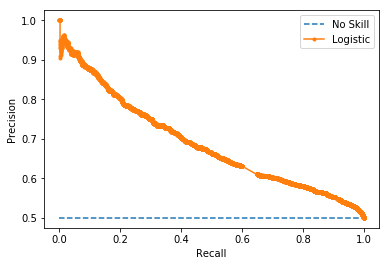

In [54]:
# plot the precision-recall curves
no_skill = len(yTest[yTest==1]) / len(yTest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [55]:
from sklearn.metrics import classification_report
print('\nClasification report:\n', classification_report(yTest, predictions))


Clasification report:
               precision    recall  f1-score   support

           0       0.61      0.67      0.64      5277
           1       0.64      0.58      0.61      5281

   micro avg       0.62      0.62      0.62     10558
   macro avg       0.62      0.62      0.62     10558
weighted avg       0.62      0.62      0.62     10558



In [48]:
# machine learning
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [58]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(xTrain, yTrain)
Y_pred = logreg.predict(xTest)
acc_log = round(logreg.score(xTrain, yTrain) * 100, 2)
acc_log

/home/paulius199405/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


72.03

In [58]:
logreg_accuracy = accuracy_score(yTest, Y_pred)
print(logreg_accuracy)

0.6256866830839174


In [59]:
y_score = logreg.decision_function(xTest)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(yTest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.69


In [60]:
lr_probs = logreg.predict_proba(xTest)
lr_probs = lr_probs[:, 1]

yhat = logreg.predict(xTest)
lr_precision, lr_recall, _ = precision_recall_curve(yTest, lr_probs)
lr_f1, lr_auc = f1_score(yTest, yhat), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.613 auc=0.686


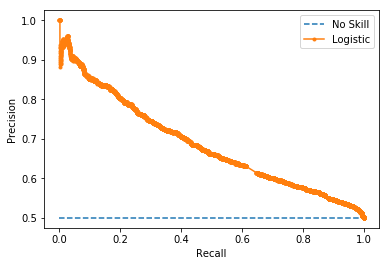

In [61]:
# plot the precision-recall curves
no_skill = len(yTest[yTest==1]) / len(yTest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [62]:
print('\nClasification report:\n', classification_report(yTest, Y_pred))


Clasification report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64      5277
           1       0.63      0.59      0.61      5281

   micro avg       0.63      0.63      0.63     10558
   macro avg       0.63      0.63      0.63     10558
weighted avg       0.63      0.63      0.63     10558



In [86]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(xTrain, yTrain)
Y_pred = gaussian.predict(xTest)

In [87]:
gaus_accuracy = accuracy_score(yTest, Y_pred)
print(gaus_accuracy)

0.5535139230914946


In [66]:
print('\nClasification report:\n', classification_report(yTest, Y_pred))


Clasification report:
               precision    recall  f1-score   support

           0       0.53      0.91      0.67      5277
           1       0.69      0.19      0.30      5281

   micro avg       0.55      0.55      0.55     10558
   macro avg       0.61      0.55      0.49     10558
weighted avg       0.61      0.55      0.49     10558



In [68]:
lr_probs = gaussian.predict_proba(xTest)
lr_probs = lr_probs[:, 1]

yhat = gaussian.predict(xTest)
lr_precision, lr_recall, _ = precision_recall_curve(yTest, lr_probs)
lr_f1, lr_auc = f1_score(yTest, yhat), auc(lr_recall, lr_precision)
print('Gaussian: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Gaussian: f1=0.302 auc=0.644


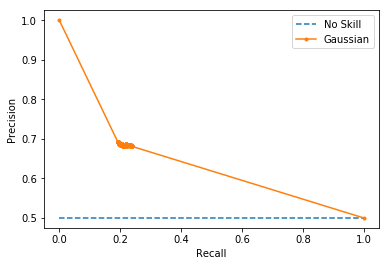

In [69]:
# plot the precision-recall curves
no_skill = len(yTest[yTest==1]) / len(yTest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Gaussian')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [49]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(xTrain, yTrain)
Y_pred = linear_svc.predict(xTest)

/home/paulius199405/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [50]:
lin_accuracy = accuracy_score(yTest, Y_pred)
print(lin_accuracy)

0.6241356445960027


In [52]:
from sklearn.metrics import classification_report

print('\nClasification report:\n', classification_report(yTest, Y_pred))


Clasification report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64      5314
           1       0.63      0.58      0.61      5243

   micro avg       0.62      0.62      0.62     10557
   macro avg       0.62      0.62      0.62     10557
weighted avg       0.62      0.62      0.62     10557



In [53]:
y_score = linear_svc.decision_function(xTest)
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(yTest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.67


In [56]:
from sklearn.metrics import precision_recall_curve
lr_probs = linear_svc._predict_proba_lr(xTest)
lr_probs = lr_probs[:, 1]

yhat = linear_svc.predict(xTest)
lr_precision, lr_recall, _ = precision_recall_curve(yTest, lr_probs)
lr_f1, lr_auc = f1_score(yTest, yhat), auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.606 auc=0.670


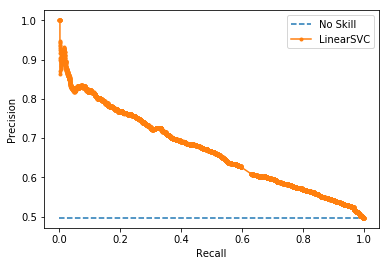

In [57]:
# plot the precision-recall curves
no_skill = len(yTest[yTest==1]) / len(yTest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='LinearSVC')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [58]:
### Lasso

from sklearn.linear_model import LassoCV
las = LassoCV(cv=5, random_state=0).fit(xTrain, yTrain)
Y_pred = las.predict(xTest)


In [56]:
print('Lasso Regression: R^2 score on training set', las.score(xTrain, yTrain)*100)
print('Lasso Regression: R^2 score on test set', las.score(xTest, yTest)*100)

Lasso Regression: R^2 score on training set 14.55891807180848
Lasso Regression: R^2 score on test set 8.292321071608544


In [59]:
actual_cost = list(yTest)
actual_cost = np.asarray(actual_cost)

In [64]:
Y_pred

array([0.6260143 , 0.58502557, 0.42797747, ..., 0.48585628, 0.48178499,
       0.49807964])

In [60]:
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

In [ ]:
mse = np.mean((pred_cv - y_cv)**2)

lassoReg.score(x_cv,y_cv)



In [66]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(xTrain, yTrain)

#pred = lassoReg.predict(x_cv)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [114]:
coef=las.coef_
type(coef)
len(coef)


6142

In [116]:
print(coef)

[ 0.11321617 -0.         -0.08018679 ...  0.          0.
  0.        ]


In [120]:
from sklearn.metrics import roc_auc_score
lasso_performance = roc_auc_score(yTest, Y_pred)
print('Lasso: Area under the ROC curve = {}'.format(lasso_performance))

Lasso: Area under the ROC curve = 0.6799365286209815


In [89]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(xTrain)
X_train = scaling.transform(xTrain)
X_test = scaling.transform(xTest)

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, yTrain)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, yTrain) * 100, 2)
acc_svc

/home/paulius199405/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [75]:
# Decision Trees

decision_tree = DecisionTreeClassifier()
decision_tree.fit(xTrain, yTrain)
Y_pred = decision_tree.predict(xTest)
dtaccuracy = accuracy_score(yTest, Y_pred)


In [76]:
dtaccuracy = accuracy_score(yTest, Y_pred)

In [77]:
print(dtaccuracy)

0.573972343246827


In [78]:
print('\nClasification report:\n', classification_report(yTest, Y_pred))


Clasification report:
               precision    recall  f1-score   support

           0       0.57      0.63      0.60      5277
           1       0.58      0.52      0.55      5281

   micro avg       0.57      0.57      0.57     10558
   macro avg       0.57      0.57      0.57     10558
weighted avg       0.57      0.57      0.57     10558



In [80]:
lr_probs = decision_tree.predict_proba(xTest)
lr_probs = lr_probs[:, 1]

yhat = decision_tree.predict(xTest)
lr_precision, lr_recall, _ = precision_recall_curve(yTest, lr_probs)
lr_f1, lr_auc = f1_score(yTest, yhat), auc(lr_recall, lr_precision)
print('dt: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

dt: f1=0.549 auc=0.658


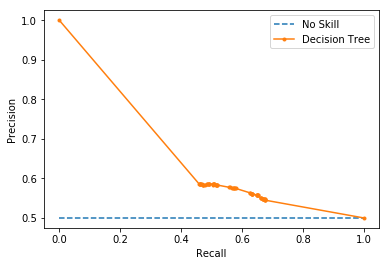

In [81]:
# plot the precision-recall curves
no_skill = len(yTest[yTest==1]) / len(yTest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [82]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(xTrain, yTrain)
Y_pred = random_forest.predict(xTest)
random_forest.score(xTrain, yTrain)
rf_accuracy = accuracy_score(yTest, Y_pred)
print(rf_accuracy)

0.623508240197007


In [83]:
lr_probs = random_forest.predict_proba(xTest)
lr_probs = lr_probs[:, 1]

yhat = random_forest.predict(xTest)
lr_precision, lr_recall, _ = precision_recall_curve(yTest, lr_probs)
lr_f1, lr_auc = f1_score(yTest, yhat), auc(lr_recall, lr_precision)
print('rf: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

rf: f1=0.611 auc=0.662


In [84]:
print('\nClasification report:\n', classification_report(yTest, Y_pred))


Clasification report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64      5277
           1       0.63      0.59      0.61      5281

   micro avg       0.62      0.62      0.62     10558
   macro avg       0.62      0.62      0.62     10558
weighted avg       0.62      0.62      0.62     10558



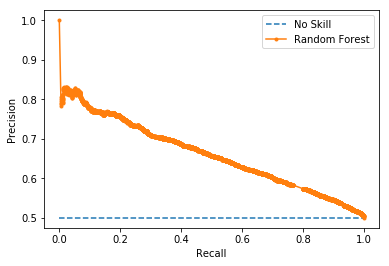

In [85]:
# plot the precision-recall curves
no_skill = len(yTest[yTest==1]) / len(yTest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xTrain, yTrain)
Y_pred = knn.predict(xTest)
knn_accuracy = accuracy_score(yTest, Y_pred)
print(knn_accuracy)

In [72]:
########## Generating Coefficients
dict_for_df_ = {}
for idx, col_name in enumerate(xTrain.columns):
    #print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))
    x = col_name
    y = logreg.coef_[0][idx]
    dict_for_df_[idx] = [x,y] 

In [73]:
df_ = pd.DataFrame(dict_for_df_)
df_

,0,1,2,3,4,5,6,7,8,9,...,6114,6115,6116,6117,6118,6119,6120,6121,6122,6123
0,thank,certain,amount,time,bitcoin,return,wallet,know,sort,frame,...,printer,freecodecamp,pp,villagers,correspondence,eli,personb,pete,billionth,hunter
1,0.22503,0.416816,0.272747,-0.105518,0.0102077,-0.0378492,0.341012,0.158273,0.589224,-0.982498,...,0.105786,-0.102746,0.263036,0.410533,0.384952,0.403655,0.553452,0,-0.402638,-0.545174


In [74]:
for idx, col_name in enumerate(xTrain.columns):
    print("The coefficient for {} is {}".format(col_name, logreg.coef_[0][idx]))

The coefficient for thank is 0.22502963722890995
The coefficient for certain is 0.4168158711305582
The coefficient for amount is 0.2727469744305324
The coefficient for time is -0.10551773972953946
The coefficient for bitcoin is 0.01020773485185364
The coefficient for return is -0.03784920149780638
The coefficient for wallet is 0.34101233117197066
The coefficient for know is 0.15827286908909063
The coefficient for sort is 0.5892241377926247
The coefficient for frame is -0.982498222101138
The coefficient for gta is -0.8374361995324833
The coefficient for couldve is 1.012385502486182
The coefficient for seen is 0.00792087042415452
The coefficient for screen is 0.26232048040548117
The coefficient for hacker is -0.0082807113742481
The coefficient for think is -0.015399651095519712
The coefficient for topped is -0.13144652367121618
The coefficient for whole is -0.1531491622741702
The coefficient for russia is -0.31136493626048023
The coefficient for campaign is -1.026653085486575
The coeffic

The coefficient for extremely is -0.13989912408853913
The coefficient for estimated is -0.4350982365791492
The coefficient for included is -0.8378331360853851
The coefficient for liquidate is 0.7456628511517914
The coefficient for uncle is -0.05830765854708485
The coefficient for ride is 0.04169176282443473
The coefficient for double is 0.18123639787727203
The coefficient for halved is 0.22283176409725344
The coefficient for ha is -0.4783066113009381
The coefficient for troll is -0.7576132922128289
The coefficient for electric is -0.5718725997299794
The coefficient for shows is -0.5713126820327166
The coefficient for among is -0.6989635910659535
The coefficient for economy is 0.23194449575794954
The coefficient for sauce is 0.9495335578070009
The coefficient for test is 0.6319719081476127
The coefficient for release is 0.31750900980679964
The coefficient for lighting is 0.7091707371965973
The coefficient for third is -0.22690258582972397
The coefficient for applications is 0.5282563503

The coefficient for recouped is 1.0382734764505686
The coefficient for venture is 0.26065928642980146
The coefficient for numerous is 0.7362454390229739
The coefficient for fields is 0.43270711195528616
The coefficient for develop is -0.1814327733747629
The coefficient for connections is 0.09907141645255906
The coefficient for restaurant is -0.1469047070827193
The coefficient for nights is -0.13069758635423515
The coefficient for nerds is 0.11026965904727778
The coefficient for strip is 0.06523989249135434
The coefficient for batching is -0.2760918744053545
The coefficient for practice is -0.5235467549024272
The coefficient for barrier is 0.9198771062546791
The coefficient for suits is 0.42371409971204904
The coefficient for enemy is 0.17211722610105817
The coefficient for entity is 0.013222005323238509
The coefficient for employed is -0.44989056876426414
The coefficient for participants is 0.41975326327053547
The coefficient for reaction is 0.01643508165881377
The coefficient for freq

In [75]:
results_ = pd.DataFrame()
results_['co1'] = dict_for_df_.keys()
results_['co2'] = dict_for_df_.values()

In [76]:
df_ = df_.T.rename(columns={
    0: 'Keys_Column',
    1: 'Values_Column'
})

In [77]:
df_
########### END OF Coefficientds

,Keys_Column,Values_Column
0,thank,0.22503
1,certain,0.416816
2,amount,0.272747
3,time,-0.105518
4,bitcoin,0.0102077
5,return,-0.0378492
6,wallet,0.341012
7,know,0.158273
8,sort,0.589224
9,frame,-0.982498


In [78]:
df_.to_csv('coef_logreg.csv')